# Explanatory Data Analysis

### Roles to Explore:

In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filtering for US Data Analyst roles

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

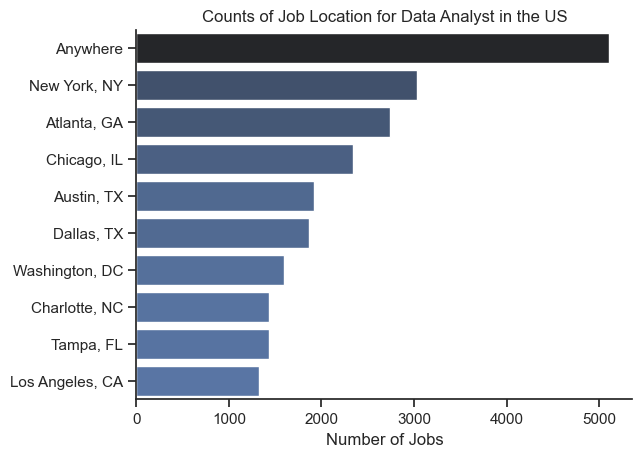

In [15]:
import seaborn as sns

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Location for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

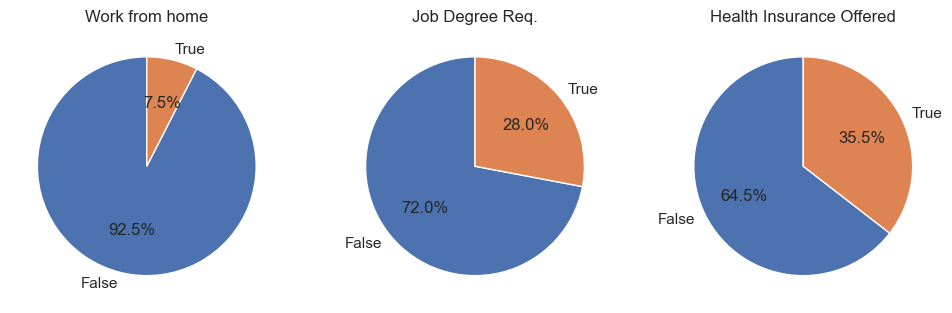

In [17]:

dict_column = {
    'job_work_from_home': 'Work from home', #value is what it will be written in our chart
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()): #because of dictionary value we are providing column, title
    ax[i].pie(df_DA_US[column].value_counts(),startangle= 90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

### Companies to Explore

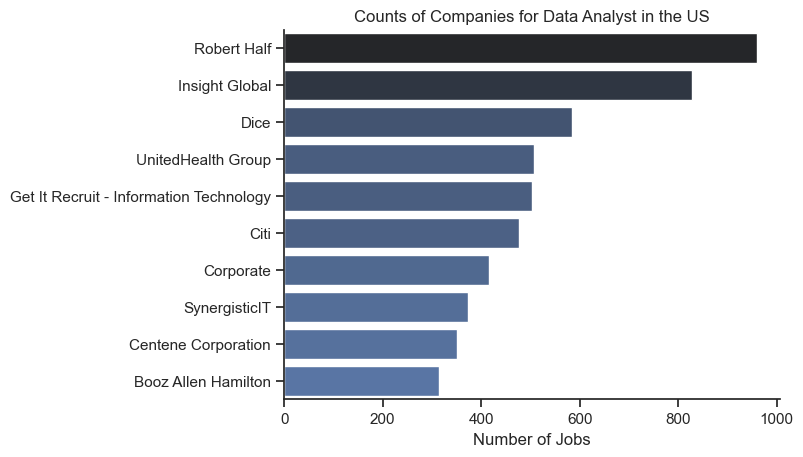

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()